In [6]:
import pandas as pd

data_path = "results/table_g1.7_T0.3_a0.0_m6.0_i0.0_r0.2_e400.0.csv"
data = pd.read_csv(data_path)

data.head()

,nH,red_chi_squared,gamma,power_norm_fake,power_norm_fit,temp,disk_norm_fake,disk_norm_fit,error_disk_norm,d,d_fit,error_d,frac_uncert,med_frac_uncert
0,0.5,0.420387,1.700198,0.357401,3.006032e-01,0.278343,23829.903066,37512.052630,13682.149564,1,0.797884,-0.202116,-0.202116,4.239946
1,0.5,0.410767,2.939999,0.089350,2.010690e-21,0.239471,5957.475767,90091.155334,84133.679567,2,0.514304,-1.485696,-0.742848,19.215101
2,0.5,0.410855,2.586282,0.039711,0.000000e+00,0.208114,2647.767007,344901.979343,342254.212335,3,0.262853,-2.737147,-0.912382,22.153836
3,0.5,0.408515,2.608906,0.022338,0.000000e+00,0.304409,1489.368942,10239.176319,8749.807377,4,1.654446,-2.345554,-0.586389,9.550755
4,0.5,0.413548,2.300000,0.014296,0.000000e+00,0.230469,953.196123,94377.573597,93424.377474,5,0.502489,-4.497511,-0.899502,15.302761


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Drop rows where 'frac_uncert' might be NaN to avoid issues in plotting
data_clean = data.dropna(subset=['frac_uncert'])
data_clean = data[data['frac_uncert']<100]

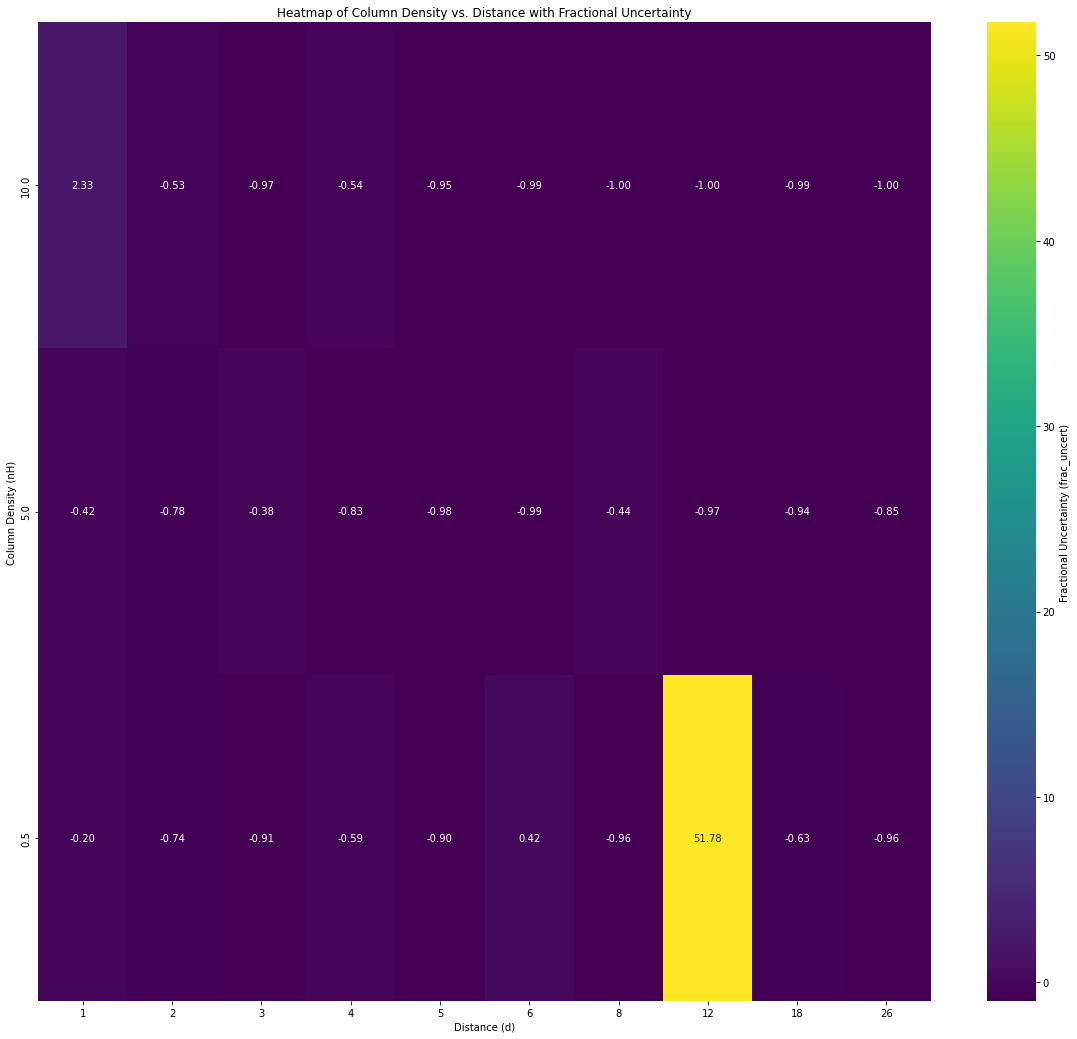

In [8]:
import seaborn as sns

# Creating a pivot table for the heatmap
pivot_table = data_clean.pivot_table(index='nH', columns='d', values='frac_uncert', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Fractional Uncertainty (frac_uncert)'})
heatmap.set_title('Heatmap of Column Density vs. Distance with Fractional Uncertainty')
heatmap.set_xlabel('Distance (d)')
heatmap.set_ylabel('Column Density (nH)')
heatmap.invert_yaxis()
plt.show()


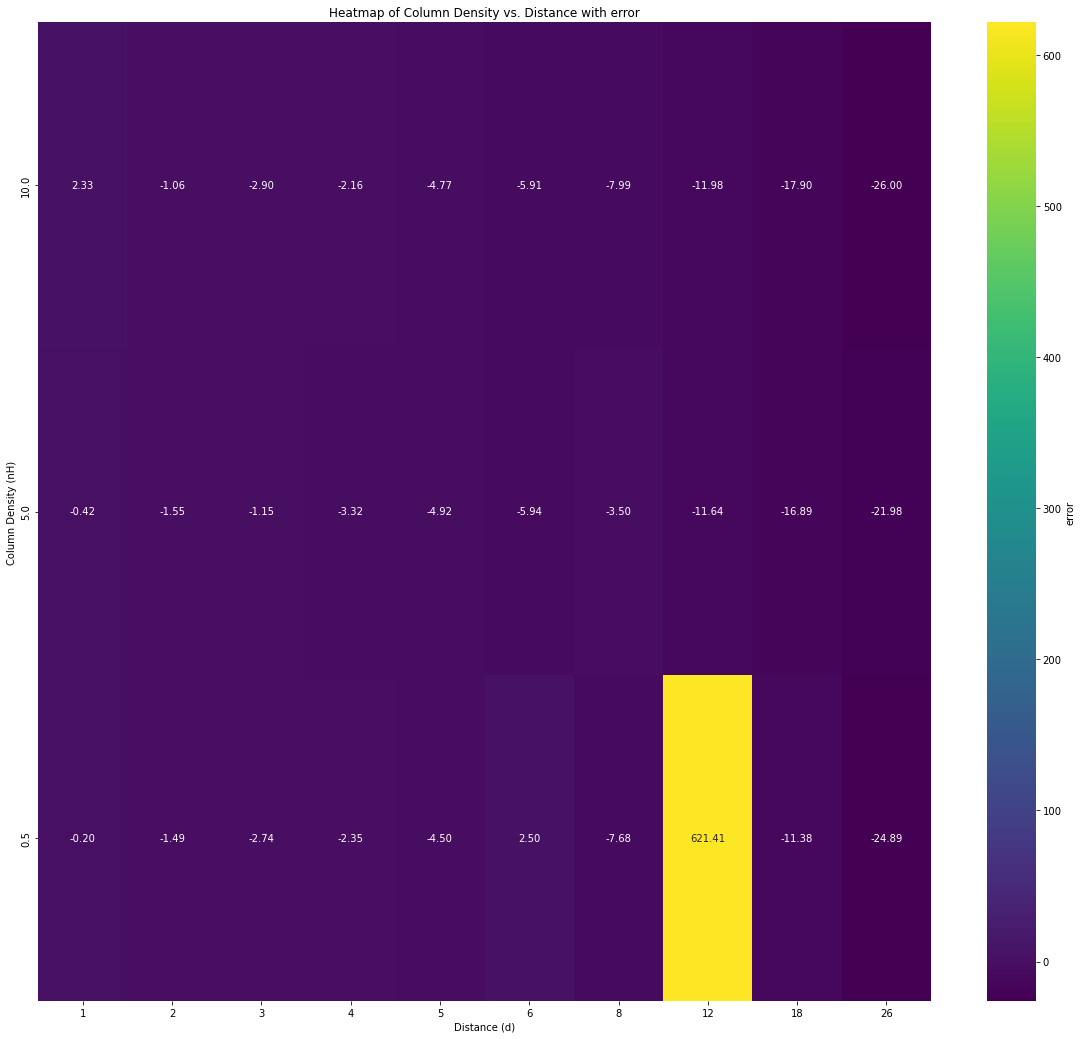

In [9]:
# Creating a pivot table for the heatmap
pivot_table = data_clean.pivot_table(index='nH', columns='d', values='error_d', aggfunc=np.mean)

# Plotting the heatmap
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'error'})
heatmap.set_title('Heatmap of Column Density vs. Distance with error')
heatmap.set_xlabel('Distance (d)')
heatmap.set_ylabel('Column Density (nH)')
heatmap.invert_yaxis()
plt.show()
